In [124]:
import keras
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('./dataset.csv', header=0)

#### To prepare the dataframe for the first time

df.drop(df.columns[[0,4]], axis=1, inplace=True)
df.to_csv('./dataset.csv', index=False)

In [61]:
#### Column Labels

labels = ['Cohesion (Pa)', 'Angle of Internal Friction', 'Slope angle (degree)', 'Factor of Safety (FOS)']

In [62]:
#### Columns

cohesion = df[labels[0]]
aois = df[labels[1]]
slope_angle = df[labels[2]]
fos = df[labels[3]]

<AxesSubplot:>

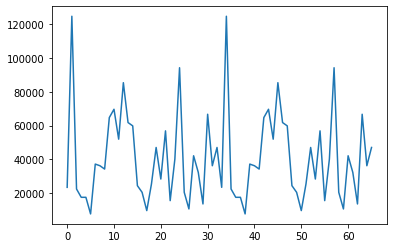

In [63]:
#### Data plot for Cohesion

cohesion.plot()

<AxesSubplot:>

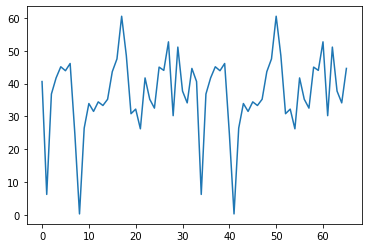

In [64]:
#### Data plot for Angle of Internal Friction

aois.plot()

<AxesSubplot:>

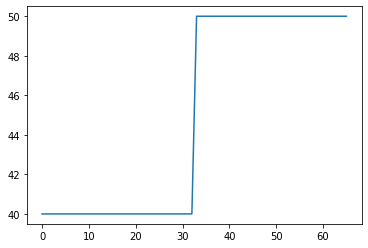

In [65]:
#### Data plot for Slope Angle

slope_angle.plot()

<AxesSubplot:>

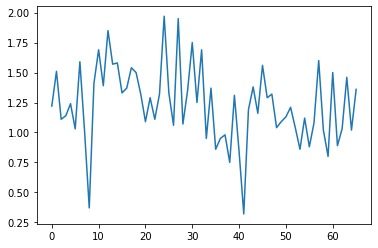

In [66]:
#### Data plot for Factor of Safety

fos.plot()

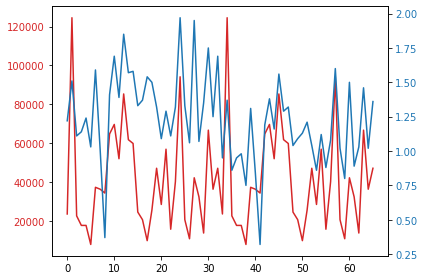

In [67]:
#### Data plot between Cohesion and Factor of Safety

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel = ('Observations')
ax1.set_ylabel = ('Cohesion (Pa)')
ax1.plot(cohesion, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel = ('Factor of Safety')
ax2.plot(fos, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

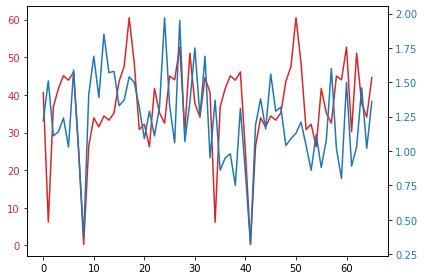

In [68]:
#### Data plot between Angle of Internal Friction and Factor of Safety

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel = ('Observations')
ax1.set_ylabel = ('Angle of Internal Friction')
ax1.plot(aois, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel = ('Factor of Safety')
ax2.plot(fos, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [144]:
#### Preparing data for feeding

X_train = df.drop(df.columns[[2,3]], axis=1)
X_train = tf.convert_to_tensor(X_train.values)

Y_train = df["Factor of Safety (FOS)"]
Y_train = tf.convert_to_tensor(Y_train.values)

In [134]:
#### Building ANN

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(input_dim = 2, units = 10, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units = 5, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units = 10, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units = 10, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units = 10, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units = 5, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units = 1, activation='sigmoid', kernel_initializer='uniform'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train,Y_train,batch_size=50, epochs=20)

Epoch 1/20
2/2 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.0000e+00
Epoch 2/20
2/2 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.0000e+00
Epoch 3/20
2/2 [==============================] - 0s 9ms/step - loss: 0.6901 - accuracy: 0.0000e+00
Epoch 4/20
2/2 [==============================] - 0s 8ms/step - loss: 0.6886 - accuracy: 0.0000e+00
Epoch 5/20
2/2 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.0000e+00
Epoch 6/20
2/2 [==============================] - 0s 7ms/step - loss: 0.6857 - accuracy: 0.0000e+00
Epoch 7/20
2/2 [==============================] - 0s 5ms/step - loss: 0.6842 - accuracy: 0.0000e+00
Epoch 8/20
2/2 [==============================] - 0s 5ms/step - loss: 0.6828 - accuracy: 0.0000e+00
Epoch 9/20
2/2 [==============================] - 0s 13ms/step - loss: 0.6813 - accuracy: 0.0000e+00
Epoch 10/20
2/2 [==============================] - 0s 6ms/step - loss: 0.6799 - accuracy: 0.0000e+0

In [130]:
X_test = tf.convert_to_tensor([[28438.995,32.2]])
Y_test = tf.convert_to_tensor([1.09])

In [142]:
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 3ms/step - loss: 0.6698 - accuracy: 0.0000e+00


[0.6697964668273926, 0.0]

In [143]:
str(model.predict(X_test))

'[[0.50997746]]'